In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [2]:
digits_data = load_digits()
df = pd.DataFrame(digits_data['data'],columns=digits_data['feature_names'])

In [3]:
df['target'] = digits_data['target']

In [4]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
print(digits_data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [28]:
image = df.iloc[1000,:-1].values
image = image.reshape((8,8))

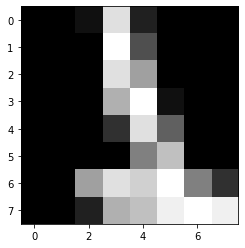

In [29]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_data['data'],
                                                     digits_data['target'],test_size=0.3,random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier
accuracy = []
n_estimator_range = np.arange(50,180,1)
for estimator in n_estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state = 0)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

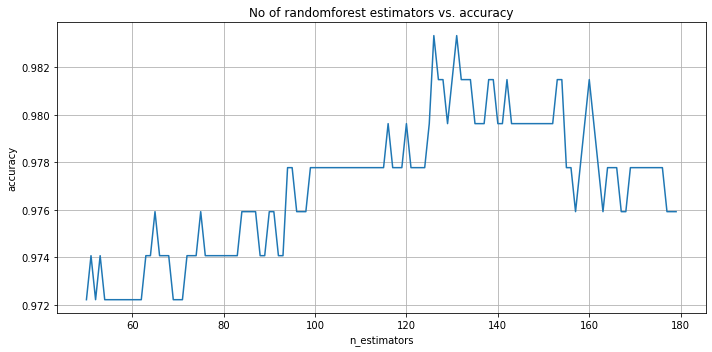

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,5))
ax.grid(True)

ax.plot(n_estimator_range, accuracy)
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')
ax.set_title('No of randomforest estimators vs. accuracy')
fig.tight_layout()

In [51]:
feature_importance = clf.feature_importances_
features = digits_data['feature_names']

<BarContainer object of 64 artists>

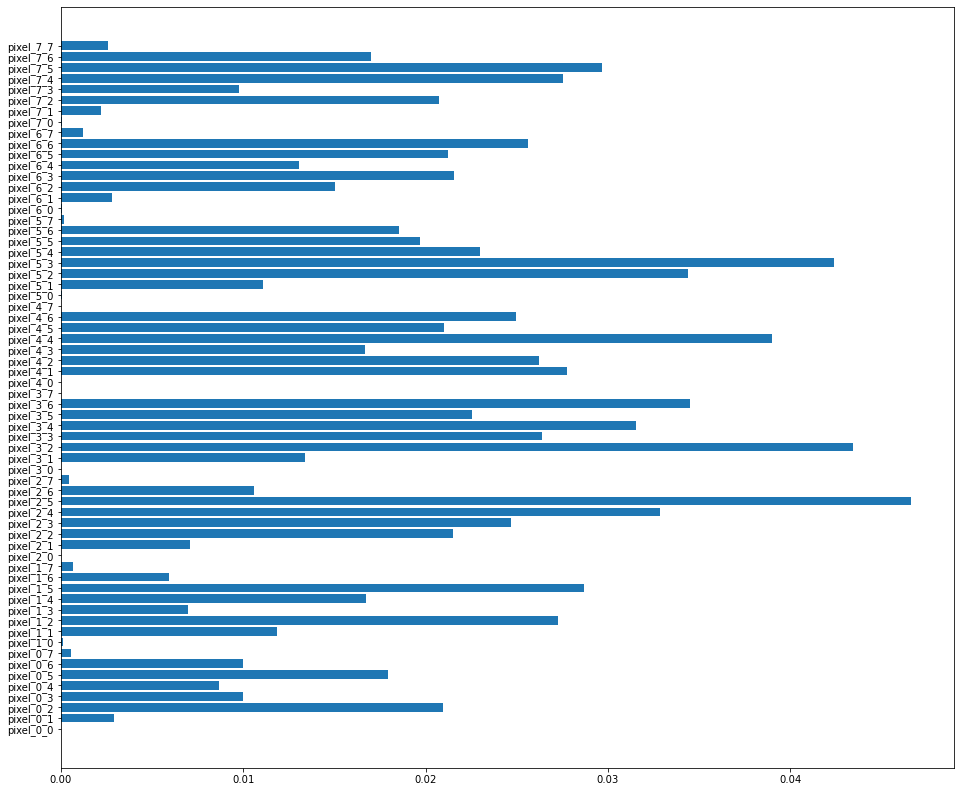

In [58]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,14))
plt.barh(features, feature_importance)
ax.set_xlabel('level of importance')
ax.set_ylabel('features')

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90, random_state = 0)
pca.fit(digits_data['data'])

PCA(n_components=0.9, random_state=0)

In [62]:
X_pca = pca.transform(digits_data['data'])

X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_pca, digits_data['target'],
                                                            test_size = 0.3, random_state=0)

clf_pca = RandomForestClassifier(n_estimators=130,random_state=0)
clf_pca.fit(X_p_train, y_p_train)
print(clf_pca.score(X_p_test, y_p_test))

0.9685185185185186


In [63]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
        ('pca', PCA(n_components=0.9, random_state=0)),
        ('rfclf', RandomForestClassifier(n_estimators=130, random_state=0))
    ])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9629629629629629

In [71]:
pipe.set_params(rfclf__n_estimators=500)

Pipeline(steps=[('pca', PCA(n_components=0.9, random_state=0)),
                ('rfclf',
                 RandomForestClassifier(n_estimators=500, random_state=0))])

In [72]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9703703703703703